The Bias-Variance trade-off is one of those things that you try to search and nothing worth reading comes out.

Every article I read about it is not well explained, because the author does not understand it. I have found no good intuition behind this concept, and the lack of mathematical explanations is frustrating too.

I will try to explain the concept from the best of my knowledge, which was gathered mainly from these sources:

https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html

http://scott.fortmann-roe.com/docs/BiasVariance.html

http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/ < el mejor a la fecha

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Bias and Variance are two inherent properties of any supervised regression or classification algorithm $A$. Before going into mathematical details, I think it is more worthy of our time to try to see how these two properties arise by themselves from a practical and easy example.

For starters, allow me to assume that $A$ is a Linear Regression, which is going to be fitted to some training dataset $D$, composed of $(x,y)$ training pairs, such that  $D=\{(x_0, y_0), ..., (x_n,y_n)\}$. Also, it is crucial to remember that $D$ is always a *sample* from the space of all the possible training points.

For example, let's assume that we *know* the inherent function $f$ that *generates* the training space. Also, let's assume that $f=f(x)=-x^4+5x^2$.

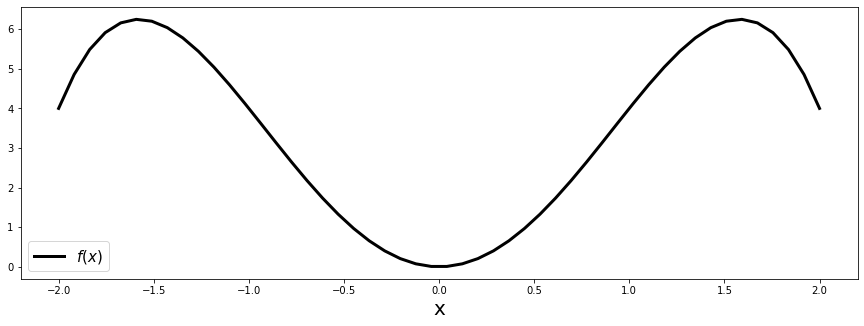

In [ ]:
plt.figure(figsize=(15,5))
x = np.linspace(-2, 2, 50)
f = -x**4 + 5*x**2
plt.plot(x, f, linewidth=3, color="black", zorder=1, label="$f(x)$");
plt.legend(fontsize=15, loc="lower left");
plt.xlabel("x", size=20);

Now, suppose that we are able to measure (or sample) some $y$ value out of this function. Given this, it is proper to assume that we are going to be dealing with some type of noise in such measures (from the sampling apparatus, from the ceiling light, from nature itself). So:

$$
y = f(x) + \epsilon
$$

This means that for each sampled $x_i$, its associated $y_i$ is going to be the *actual* value of the generating function $f(x_i)$ **plus** some additional numerical garbage $\epsilon_i$. The thing is that the value of $\epsilon_i$ is not going to be always the same (it will vary depending on unknown conditions). So, $\epsilon_i$ is in reality a sample from some type of hidden distribution, that we are going to assume Normal, with median $\mu=0$, and variance $\sigma=1$. So:

$$
\epsilon_i \leftarrow N(0, 1)
$$

So, let's now imagine that we run $4$ experiments, and in each we sample $50$ points of $y$, equispaced in the interval $x=[-2,2]$.

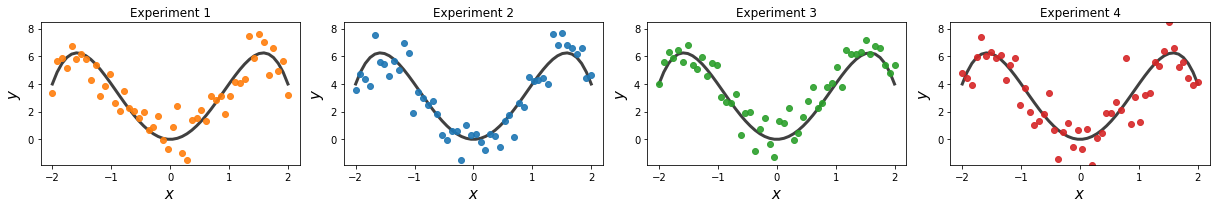

In [ ]:
plt.figure(figsize=(17, 3))
experiments = 4
colors = ["tab:orange", "tab:blue", "tab:green", "tab:red"]
y_list = []
for i in range(0, experiments):
    epsilon = np.random.normal(0, 1, len(x))
    y = f + epsilon
    y_list.append(y)

y_max = np.max(y_list)
y_min = np.min(y_list)
for i,y in enumerate(y_list):
    plt.subplot(1, experiments, i+1)
    plt.plot(x, f, linewidth=3, color="black", zorder=1, label="$f(x)$", alpha=0.75)
    plt.scatter(x, y, alpha=0.9, zorder=2, color=colors[i])
    plt.ylim((y_min, y_max))
    plt.xlabel("$x$", size=15)
    plt.ylabel("$y$", size=15)
    plt.title("Experiment " + str(i+1))
    plt.tight_layout()

As you can see, despite the generating function $f(x)$ being unique, the sampling is completeley different in each experiment. The thing is that this scenario replicates *exactly* what happens in real life problems. One *never* knows the shape of $f$, but only noisy approximations of it, given by means of sampling $y$.

Let's now train


So, if we want to capture the behaviour of $f$ through sampling, it is expected that our algorithm $A$ will be able to perform *similarly* despite which sampling scenario (or experiment) we use. This makes sense, right? Imagine that one day you train $A$ on a given sampling of $f$, and you get a good performance. The next day you train $A$ on a different sampling of $f$, and you get a bad performance. This is nuts, and will drive anyone crazy. So, you need consistency of $A$ among different sampled training datasets $D$.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

models = {}
y_preds = {}

degrees = [1, 2, 4, 15, 30]
for degree in degrees:

    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x.reshape(-1,1))

    models[degree] = []
    for y in y_list:
        model = LinearRegression()
        model.fit(x_poly, y)
        models[degree].append(model)

    y_preds[degree] = []
    for model in models[degree]:
        y_pred = model.predict(x_poly)
        y_preds[degree].append(y_pred)

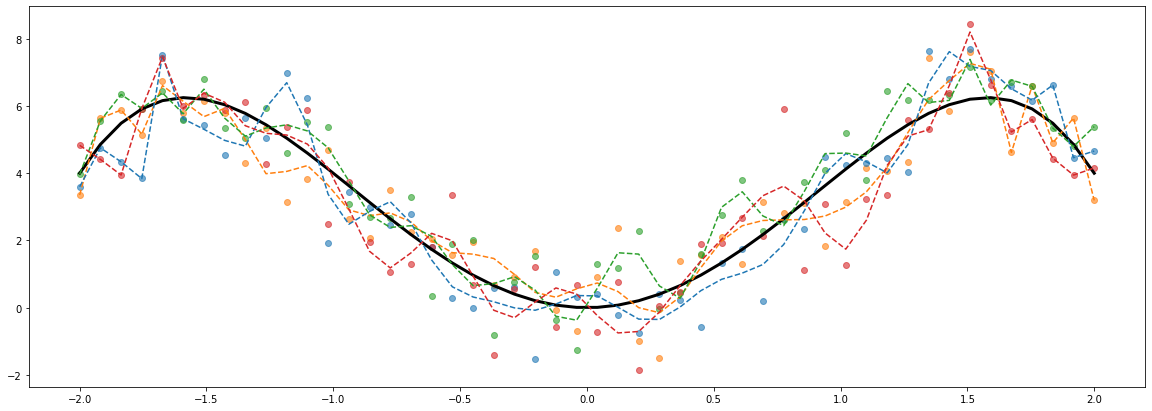

In [ ]:
plt.figure(figsize=(20,7), facecolor="white")
plt.plot(x, f, linewidth=3, color="black", zorder=1, label="$f(x)$")
for i,y_pred in enumerate(y_preds[30]):
    plt.plot(x, y_pred, linestyle="--", color=colors[i])
    plt.scatter(x, y_list[i], alpha=0.6, color=colors[i])

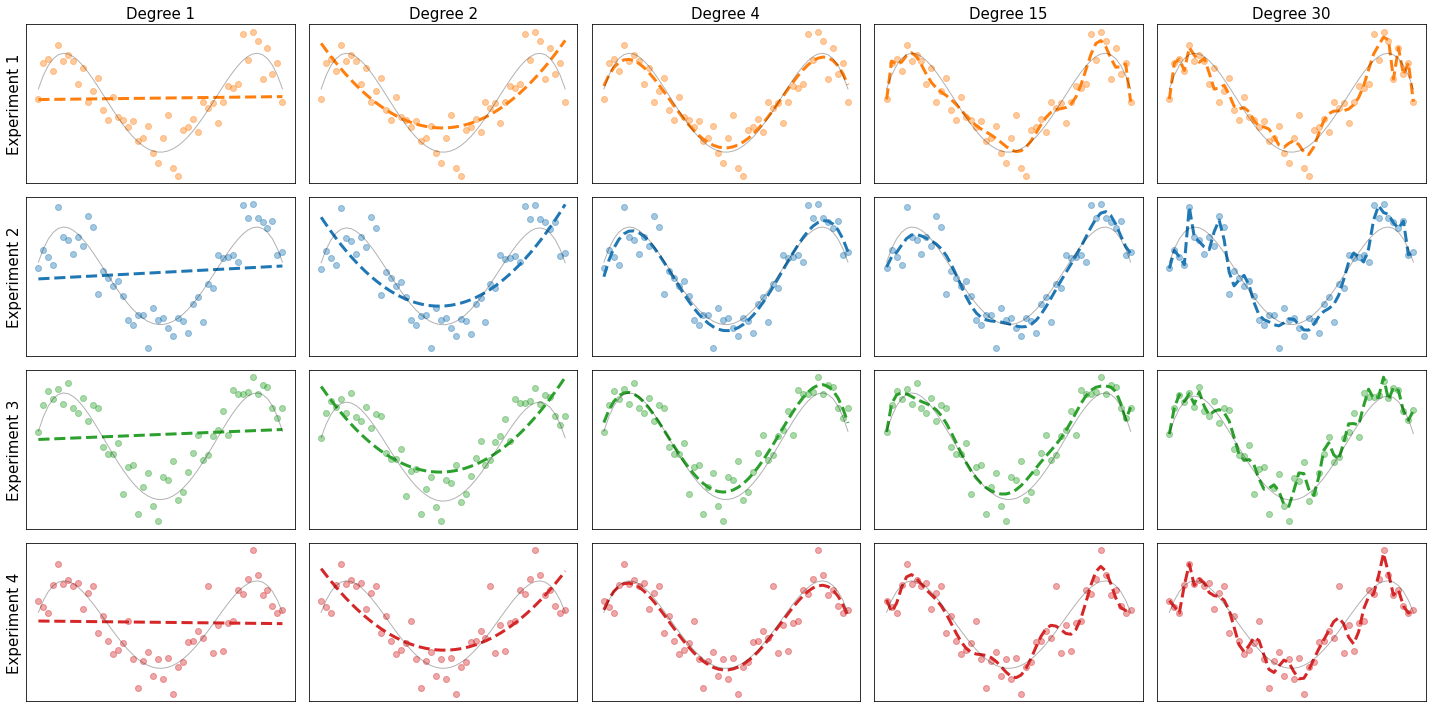

In [ ]:
plt.figure(figsize=(20,10), facecolor="white")

for i in range(0, experiments):
    for j,degree in enumerate(degrees):
        plt.subplot2grid((experiments, len(degrees)), (i,j))
        plt.plot(x, y_preds[degree][i], linewidth=3, linestyle="--", color=colors[i])
        plt.scatter(x, y_list[i], alpha=0.4, color=colors[i])
        plt.plot(x, f, linewidth=1, alpha=0.3, color="black")
        if i == 0: plt.title("Degree " + str(degree), size=15)
        if j == 0: plt.ylabel("Experiment " + str(i+1), size=15)
        plt.xticks([], [])
        plt.yticks([], [])
        plt.tight_layout()

$$
\mu = E[x] = \sum_{i=1}^n x_i p_i \\
$$

$$
\begin{align}
Var[x]
&= E[(x-\mu)^2] \\
&= E[(x-E[x])^2] \\
&= E[x^2 - 2xE[x] + E^2[x]] \\
&= E[x^2] - E[2xE[x]] + E[E^2[x]] \\
&= E[x^2] - E[2] \cdot E[x] \cdot E[E[x]] + E[E^2[x]] \\
&= E[x^2] - 2E[x]E[x] + E^2[x] \\
&= E[x^2] - 2E^2[x] + E^2[x] \\
&= E[x^2] - E^2[x] \\
\end{align}
$$

8.673617379884035e-18 0.48393956850830155


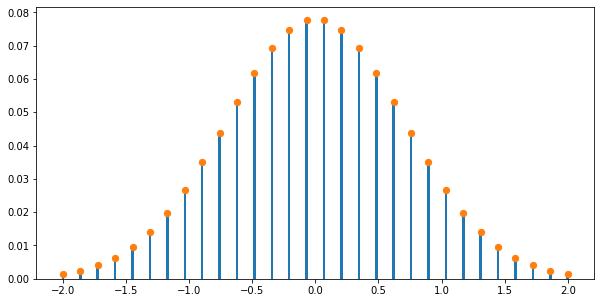

In [ ]:
plt.figure(figsize=(10,5))
x = np.linspace(-2, 2, 30)
y = np.exp(-x**2)
y = y / np.sum(y)
plt.bar(x, y, width=0.02, align="center", zorder=0)
plt.scatter(x, y, s=40, zorder=1)
print(np.sum(x*y), np.sum(x*x*y))

$$
\underset{\mu=0}{Var[x]} = E[x^2] = \sum_{i=1}^n x^2_i p_i
$$

$$
Err(x) = (y(x) - \hat{y}(x))^2
$$

$$
\begin{align}
Err
&= (y - \hat{y})^2 \\
&= y^2 - 2y\hat{y} + \hat{y}^2(x) \\
&= E[y^2(x)] - E[2y(x)\hat{y}(x)] + E[\hat{y}^2(x)] \\
&= E[(f(x) + \epsilon)^2] - E[2(f(x) + \epsilon)\hat{y}(x)] + E[\hat{y}^2(x)] \\
&= (1) - (2) + (3)
\end{align}
$$

$$
\begin{align}
E[(f(x) + \epsilon)^2]
&= E[f^2(x)+ 2 \epsilon f(x) + \epsilon^2] \\
&= E[f^2(x)]+ E[2 \epsilon f(x)] + E[\epsilon^2] \\
&= E[f^2(x)]+ 2 \epsilon E[f(x)] + \epsilon^2 \\
&= f^2(x)+ 2 \epsilon f(x) + \epsilon^2
\end{align}
$$

$$
\begin{align}
E[2(f(x) + \epsilon)\hat{y}(x)]
&= E[2 f(x) \hat{y}(x) + 2 \epsilon \hat{y}(x)] \\
&= E[2f(x) \hat{y}(x)] + E[2 \epsilon \hat{y}(x)] \\
&= 2E[f(x) \hat{y}(x)] + 2 \epsilon E[\hat{y}(x)] \\
&= 2E[f(x)] E[\hat{y}(x)] + 2 \epsilon E[\hat{y}(x)] \\
&= 2 f(x) E[\hat{y}(x)] + 2 \epsilon E[\hat{y}(x)] \\
\end{align}
$$

\begin{align}
E[Err(x)]
&= (1) - (2) + (3) \\
&= f^2(x) + 2 \epsilon f(x) + \epsilon^2 - 2f(x) E[\hat{y}(x)] - 2 \epsilon E[\hat{y}(x)] + E[\hat{y}^2(x)] \\
&= f^2(x) - 2f(x) E[\hat{y}(x)] + E[\hat{y}^2(x)] + 2 \epsilon f(x) - 2 \epsilon E[\hat{y}(x)] + \epsilon^2
\end{align}